In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("diabetes.csv") 
 
(train_set, test_set) = train_test_split(df.values, train_size=0.7, 
random_state=1337)




In [3]:
df = pd.read_csv("diabetes.csv")
(train_set, test_set) = train_test_split(df.values, train_size=0.7, random_state=278808)

train_data = train_set[:, 0:8]
train_labels = train_set[:, 8]

test_data = test_set[:, 0:8]
test_labels = test_set[:, 8]

le = LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
test_labels_encoded = le.transform(test_labels)

Ewaluacja sieci z 6 i 3 neuranami w kolejnych warstwach ukrytych: 0.7619047619047619


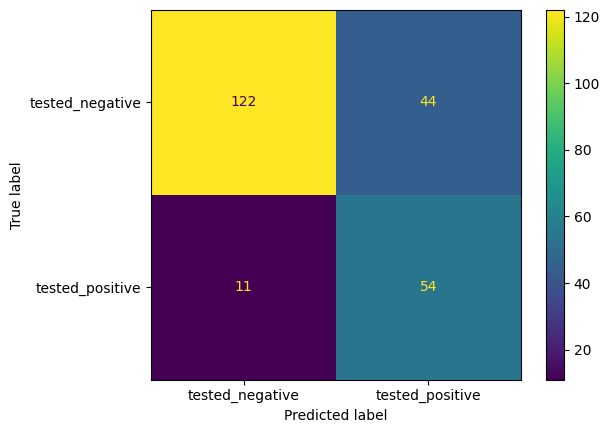

In [4]:
# create LabelEncoder object
le = LabelEncoder()

# fit LabelEncoder object on train_labels to create a mapping from words to numbers
le.fit(train_labels)

# transform train_labels and test_labels using the fitted LabelEncoder object to get numerical labels
train_labels_encoded = le.transform(train_labels)
test_labels_encoded = le.transform(test_labels)

# create StandardScaler object and scale train_data and test_data
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# create MLPClassifier object with 6 neurons in the first hidden layer and 3 neurons in the second hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(6,3), max_iter=500, activation='relu')

mlp.fit(train_data, train_labels_encoded)

# use fitted MLPClassifier object to make predictions on test_data
predictions_test = mlp.predict(test_data)

# evaluate performance of MLPClassifier using predicted labels and test_labels_encoded
print("Ewaluacja sieci z 6 i 3 neuranami w kolejnych warstwach ukrytych:", accuracy_score(predictions_test, test_labels_encoded))
cm = confusion_matrix(predictions_test, test_labels_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()